# Assignment 2

### Importing Required Libraries in Notebook

In [1]:
import pandas as pd
import numpy as np
import math
from operator import itemgetter
from matplotlib import pyplot as plt

# Part 1-1 (Robot Dataset)

### Reading Datasets

In [2]:
robot_1_data = pd.read_csv('./RobotDataset/Robot1', header = None, delimiter = ' ').dropna(axis = 1)
robot_2_data = pd.read_csv('./RobotDataset/Robot2', header = None, delimiter = ' ').dropna(axis = 1)

robot_1_train = robot_1_data.sample(frac = 0.8, random_state = 200)
robot_1_validation = robot_1_data.drop(robot_1_train.index)

robot_2_train = robot_2_data.sample(frac = 0.8, random_state = 200)
robot_2_validation = robot_2_data.drop(robot_2_train.index)

robot_1_train

,1,2,3,4,5,6,7,8
39,0,1,3,2,2,4,1,data_135
34,0,1,3,1,3,4,2,data_120
69,1,2,2,1,3,4,2,data_216
88,1,3,1,1,1,1,2,data_290
78,0,2,3,1,2,3,1,data_253
90,0,3,1,1,2,2,2,data_300
41,1,1,3,2,3,1,1,data_137
117,1,3,3,2,1,3,2,data_414
36,1,1,3,2,2,1,2,data_130
98,0,3,2,1,1,4,2,data_344


In [3]:
def eucledian(train, test):
    distance = 0.0
    for i in range(1, 7):
        distance += pow((train[i] - test[i]), 2)
    return math.sqrt(distance)

In [4]:
def find_neighbours(train_data, test_data):
    distances_list = []
    for index, row in train_data.iterrows():
        query = row.tolist()
        label = row[1]
        distance = eucledian(query, test_data)
        distances_list.append([distance, label])
    return distances_list

In [5]:
def majority_class(distances, k):
    stripped_list = sorted(distances, key = itemgetter(0))[:k]
    label_0 = 0
    label_1 = 0
    for lst in stripped_list:
        if lst[1] == 1:
            label_1 += 1
        else:
            label_0 += 1
    return 0 if label_0 > label_1 else 1

In [16]:
def calc_metrics(predicted, actual):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(predicted)):
        if predicted[i] == actual[i] and predicted[i] == 1:
            print('tp')
            tp += 1
        elif predicted[i] == actual[i] and predicted[i] == 0:
            print('tn')
            tn += 1
        elif predicted[i] != actual[i] and predicted[i] == 1:
            print('fp')
            fp += 1
        else:
            print('fn')
            fn += 1
    accuracy = (tp + tn)/(tp + tn + fp + fn)
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    a = 1/precision
    b = 1/recall
    f1_score = 2/(a + b)
    print('Accuracy - ', accuracy)
#     print('Precision - ', precision)
#     print('Recall - ', recall)
#     print('True Positive - ', tp)
#     print('True Negative - ', tn)
#     print('False Positive - ', fp)
#     print('False Negative - ', fn)
    return accuracy

Accuracy -  0.72
Accuracy -  0.64
Accuracy -  0.68
Accuracy -  0.76
Accuracy -  0.68
Accuracy -  0.68
Accuracy -  0.68
Accuracy -  0.64
Accuracy -  0.68
Accuracy -  0.68


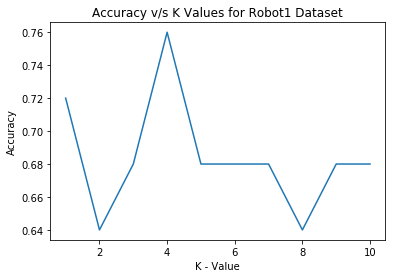

Accuracy -  0.9583333333333334
Accuracy -  0.9583333333333334
Accuracy -  1.0
Accuracy -  0.9166666666666666
Accuracy -  0.9583333333333334
Accuracy -  1.0
Accuracy -  0.9166666666666666
Accuracy -  0.9583333333333334
Accuracy -  0.9166666666666666
Accuracy -  0.9166666666666666


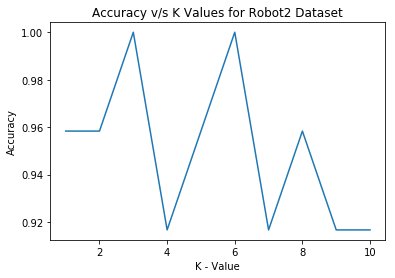

In [7]:
def kNN(train_data, test_data, k):
    prediction = []
    for index, row in test_data.iterrows():
        query = row.tolist()
        distances = find_neighbours(train_data, query)
        predicted_label = majority_class(distances, k)
        prediction.append(predicted_label)
    actual = test_data[1].tolist()
    accuracy = calc_metrics(prediction, actual)
    return accuracy

accuracy_with_different_k = []
for i in range(1, 11):
#     print('K Value - ', i)
    accuracy_with_different_k.append(kNN(robot_1_train, robot_1_validation, i))
#     print('--------------------------------')
k_values = [x for x in range(1, 11)]

plt.plot(k_values, accuracy_with_different_k)
plt.xlabel('K - Value')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s K Values for Robot1 Dataset')
plt.show()

accuracy_with_different_k = []
for i in range(1, 11):
#     print('K Value - ', i)
    accuracy_with_different_k.append(kNN(robot_2_train, robot_2_validation, i))
#     print('--------------------------------')
k_values = [x for x in range(1, 11)]

plt.plot(k_values, accuracy_with_different_k)
plt.xlabel('K - Value')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s K Values for Robot2 Dataset')
plt.show()

# Part 1-2 (Iris Dataset)

### Reading Dataset

In [8]:
iris = pd.read_csv('./Iris/Iris.csv', header = None)

iris_train = iris.sample(frac = 0.8, random_state = 200)
iris_validation = iris.drop(iris_train.index)

iris_validation

,0,1,2,3,4
1,6.3,3.3,6.0,2.5,Iris-virginica
6,5.4,3.9,1.3,0.4,Iris-setosa
7,5.7,3.8,1.7,0.3,Iris-setosa
11,5.6,2.9,3.6,1.3,Iris-versicolor
14,5.4,3.9,1.7,0.4,Iris-setosa
15,5.2,3.4,1.4,0.2,Iris-setosa
16,5.0,3.5,1.6,0.6,Iris-setosa
23,5.6,2.8,4.9,2.0,Iris-virginica
24,6.1,3.0,4.9,1.8,Iris-virginica
26,6.1,3.0,4.6,1.4,Iris-versicolor


In [18]:
def eucledian_iris(train, test):
    distance = 0.0
    for i in range(0, 4):
        distance += pow((train[i] - test[i]), 2)
    return math.sqrt(distance)

In [19]:
def find_neighbours_iris(train_data, test_data):
    distances_list = []
    for index, row in train_data.iterrows():
        query = row.tolist()
        label = row[4]
        distance = eucledian_iris(query, test_data)
        distances_list.append([distance, label])
    return distances_list

In [20]:
def majority_class_iris(distances, k):
    stripped_list = sorted(distances, key = itemgetter(0))[:k]
    label_setosa = 0
    label_virginica = 0
    label_versicolor = 0
    for lst in stripped_list:
        if lst[1] == 'Iris-setosa':
            label_setosa += 1
        elif lst[1] == 'Iris-virginica':
            label_virginica += 1
        else:
            label_versicolor += 1
    if label_setosa > label_virginica and label_setosa > label_versicolor:
        return 'Iris-setosa'
    elif label_virginica > label_setosa and label_virginica > label_versicolor:
        return 'Iris-virginica'
    elif label_versicolor > label_setosa and label_versicolor > label_virginica:
        return 'Iris-versicolor'


In [21]:
def calc_metrics_iris(predicted, actual):
    tp = 0
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            tp += 1
    accuracy = tp/len(predicted)
    print('Accuracy - ', accuracy)
    return accuracy

Accuracy -  0.9629629629629629
Accuracy -  0.8888888888888888
Accuracy -  1.0
Accuracy -  0.8518518518518519
Accuracy -  0.9259259259259259
Accuracy -  0.8518518518518519
Accuracy -  0.9259259259259259
Accuracy -  0.8888888888888888
Accuracy -  0.9629629629629629
Accuracy -  0.9259259259259259


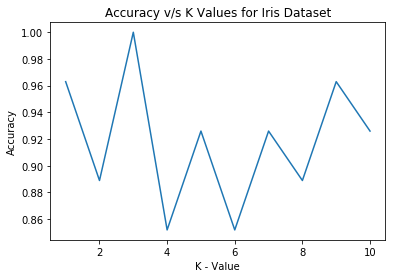

In [26]:
def kNN(train_data, test_data, k):
    prediction = []
    for index, row in test_data.iterrows():
        query = row.tolist()
        distances = find_neighbours_iris(train_data, query)
        predicted_label = majority_class_iris(distances, k)
        prediction.append(predicted_label)
    actual = test_data[4].tolist()
    accuracy = calc_metrics_iris(prediction, actual)
    return accuracy

accuracy_with_different_k = []
for i in range(1, 11):
    accuracy_with_different_k.append(kNN(iris_train, iris_validation, i))
k_values = [x for x in range(1, 11)]

plt.plot(k_values, accuracy_with_different_k)
plt.xlabel('K - Value')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s K Values for Iris Dataset')
plt.show()